In [3]:
import zipfile as zf
import json

In [10]:
with zf.ZipFile('train_val_annotation.zip', 'r') as myzip:
    print(myzip.namelist())
    category = myzip.open(myzip.namelist()[0]).readlines()
    train_val = json.load(myzip.open(myzip.namelist()[2]))
    readme = myzip.open(myzip.namelist()[1]).readlines()

['category.txt', 'readme.txt', 'train_val_videodatainfo.json']


In [11]:
tv_list = list(train_val.items())

In [17]:
for line in readme:
    line = line.decode(encoding='utf-8')
    line = line.strip()
    print(line)

MSR-VTT 10K

All video info and caption sentences are stored using the JSON file format. All data share the basic data structure below:

{
"info" : info,
"videos": [video],
"sentences": [sentence],
}

info{
"year" : str,
"version" : str,
"description": str,
"contributor": str,
"data_created": str,
}

video{
"id": int,
"video_id": str,
"category": int,
"url": str,
"start time": float,
"end time": float,
"split": str,
}

sentence{
"sen_id": int,
"video_id": str,
"caption": str,
}

The time is counted by seconds.
category name can refer to 'category.txt' for the detailed information.

Data split(video_id):
Train: video0 : video6512 (6513)
Val: video6513 : video7009 (497)
Test: video7010 : video9999 (2990)




In [19]:
sentences = train_val['sentences']

In [21]:
import numpy as np

In [22]:
length_cnt = np.zeros([1000])

In [23]:
for sent in sentences:
    caption = sent['caption']
    caption = caption.strip().split()
    if len(caption) >= 1000:
        length_cnt[999] += 1
    else:
        length_cnt[len(caption)-1] += 1

In [24]:
import matplotlib.pyplot as plt

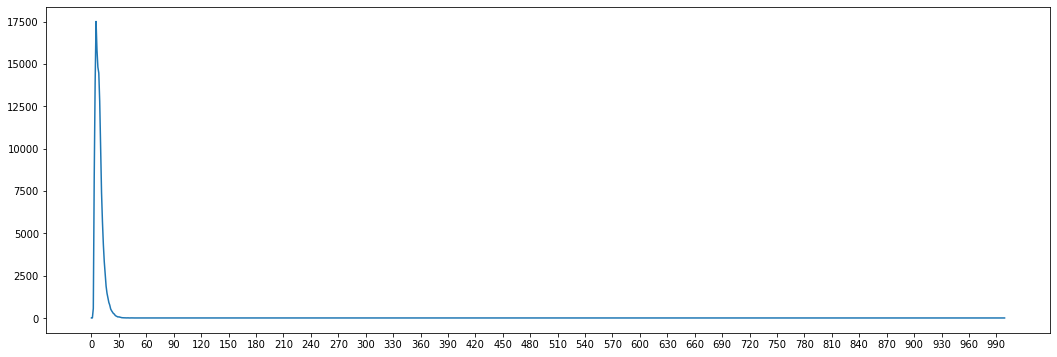

In [35]:
plt.figure(figsize=(18, 6))
plt.plot(length_cnt)
plt.gca().set_xticks(range(0, 1000, 30))
plt.show()

In [36]:
length_cnt[30:].sum()

257.0

In [37]:
length_cnt[20:30].sum()

2956.0

In [38]:
length_cnt[10:20].sum()

38841.0

In [39]:
captions30 = {}
for sent in sentences:
    caption = sent['caption']
    caption = caption.strip().split()
    if len(caption) >= 30:
        captions30[sent['sen_id']] = sent['caption']

In [41]:
for key in captions30:
    print(key, captions30[key])

9146 a man is beat boxing outside surrounded by lots of people and there are a few kids dancing one of them is trying to break dance and the crowd is excited by it
9159 a man is beat boxing outside surrounded by lots of people and there are a few kids dancing one of them is trying to break dance and the crowd is excited by it
9915  one in a white shirt and one in a blue shirt are packing groceries outside in plastic bags and the man in white distributes a bag to a man who may be homeless
11631 bob marley s song one love is being played in the background to scenes of violence and cruelty a man is being held to the ground by others and being strangled by another man
12361 a boy and girl are kissing in a car and then the scene changes to three men in a room with the decapitated head of an antlered deer on a table
12997 porky the pig moves a bag of money and replaces it with a stick of tnt as the portion of the stage it s on is cut and dropped down
13724 a game like minecraft is being play

In [44]:
import csv
with open('captions30.csv', 'w') as fo:
    writer = csv.writer(fo)
    for key in captions30:
        writer.writerow([str(key), captions30[key]])

In [46]:
import pickle
from collections import defaultdict

In [47]:
word_freq = defaultdict(lambda:0)

In [48]:
for sent in sentences:
    caption = sent['caption']
    words = caption.strip().split()
    for word in words:
        word_freq[word] += 1

In [49]:
word_list = sorted(list(word_freq.items()), key=lambda x: x[1])

In [52]:
with open('words600.csv', 'w') as fo:
    writer = csv.writer(fo)
    for w, i in reversed(word_list[-600:]):
        writer.writerow([w, i])

In [55]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/chenhaoran/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [56]:
stem_words = []
wnl = WordNetLemmatizer()
for w, i in word_list[-600:]:
    w_o = wnl.lemmatize(w)
    stem_words.append(w_o)

In [58]:
stem_set = set(stem_words)
word_set = [w for w, i in word_list]

In [59]:
for ss in stem_set:
    if ss not in word_set:
        print(ss)

ha
wa


In [62]:
for w, i in reversed(word_list[-600:]):
    w_o = wnl.lemmatize(w)
    print(w_o)

a
is
the
in
man
and
of
on
to
woman
are
with
about
talking
video
person
playing
an
people
game
two
girl
car
some
for
from
his
men
singing
while
at
show
her
cartoon
someone
showing
how
being
there
black
it
talk
white
shown
stage
young
group
woman
other
by
music
movie
dancing
boy
into
guy
song
s
food
down
something
wearing
around
up
sitting
screen
shirt
walking
a
news
another
clip
lady
red
that
blue
their
speaking
one
cooking
different
out
giving
play
kitchen
show
water
doing
driving
camera
animated
dress
front
then
he
tv
character
each
standing
scene
making
table
kid
through
room
girl
this
play
running
talk
character
ball
hair
over
explaining
paper
road
player
off
performing
band
sport
basketball
computer
inside
green
holding
small
looking
player
dish
large
baby
football
together
three
wrestling
having
audience
make
child
minecraft
dog
she
sings
very
displaying
street
horse
soccer
bowl
using
riding
fighting
ha
speaks
watching
various
going
little
suit
dance
child
match
they
new
outside
c

In [63]:
for w, i in reversed(word_list[-600:]):
    print(w)

a
is
the
in
man
and
of
on
to
woman
are
with
about
talking
video
person
playing
an
people
game
two
girl
car
some
for
from
his
men
singing
while
at
show
her
cartoon
someone
showing
how
being
there
black
it
talks
white
shown
stage
young
group
women
other
by
music
movie
dancing
boy
into
guy
song
s
food
down
something
wearing
around
up
sitting
screen
shirt
walking
as
news
another
clip
lady
red
that
blue
their
speaking
one
cooking
different
out
giving
plays
kitchen
shows
water
doing
driving
camera
animated
dress
front
then
he
tv
characters
each
standing
scene
making
table
kids
through
room
girls
this
play
running
talk
character
ball
hair
over
explaining
paper
road
player
off
performing
band
sports
basketball
computer
inside
green
holding
small
looking
players
dish
large
baby
football
together
three
wrestling
having
audience
make
children
minecraft
dog
she
sings
very
displaying
street
horse
soccer
bowl
using
riding
fighting
has
speaks
watching
various
going
little
suit
dance
child
match
they


In [64]:
wnl.lemmatize('running')

'running'

In [65]:
from nltk.stem.snowball import EnglishStemmer

In [66]:
snow_ball_stemmer = EnglishStemmer()

In [68]:
for w, i in reversed(word_list[-600:]):
    print(snow_ball_stemmer.stem(w))

a
is
the
in
man
and
of
on
to
woman
are
with
about
talk
video
person
play
an
peopl
game
two
girl
car
some
for
from
his
men
sing
while
at
show
her
cartoon
someon
show
how
be
there
black
it
talk
white
shown
stage
young
group
women
other
by
music
movi
danc
boy
into
guy
song
s
food
down
someth
wear
around
up
sit
screen
shirt
walk
as
news
anoth
clip
ladi
red
that
blue
their
speak
one
cook
differ
out
give
play
kitchen
show
water
do
drive
camera
anim
dress
front
then
he
tv
charact
each
stand
scene
make
tabl
kid
through
room
girl
this
play
run
talk
charact
ball
hair
over
explain
paper
road
player
off
perform
band
sport
basketbal
comput
insid
green
hold
small
look
player
dish
larg
babi
footbal
togeth
three
wrestl
have
audienc
make
children
minecraft
dog
she
sing
veri
display
street
hors
soccer
bowl
use
ride
fight
has
speak
watch
various
go
littl
suit
danc
child
match
they
new
outsid
crowd
tenni
discuss
cat
guitar
pan
car
ingredi
old
it
toy
voic
phone
coupl
hand
take
them
get
play
field
who
descr

In [146]:
for idx, (w, i) in enumerate(reversed(word_list[-600:])):
    if w == 'host':
        print(idx, w, i)

388 host 343


In [71]:
import pandas as pd

In [76]:
selected_words = []
with open('words600.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for idx, row in enumerate(reader):
        if idx >= 300:
            break
        selected_words.append(row[0])

In [77]:
selected_words

['man',
 'woman',
 'talking',
 'video',
 'person',
 'playing',
 'people',
 'game',
 'girl',
 'car',
 'men',
 'singing',
 'show',
 'cartoon',
 'showing',
 'black',
 'talks',
 'white',
 'shown',
 'stage',
 'young',
 'group',
 'women',
 'music',
 'movie',
 'dancing',
 'boy',
 'guy',
 'song',
 'food',
 'wearing',
 'sitting',
 'screen',
 'shirt',
 'walking',
 'news',
 'clip',
 'lady',
 'red',
 'blue',
 'speaking',
 'cooking',
 'giving',
 'plays',
 'kitchen',
 'shows',
 'water',
 'driving',
 'camera',
 'animated',
 'dress',
 'tv',
 'characters',
 'standing',
 'scene',
 'table',
 'kids',
 'room',
 'girls',
 'play',
 'running',
 'talk',
 'character',
 'ball',
 'hair',
 'explaining',
 'paper',
 'road',
 'player',
 'performing',
 'band',
 'sports',
 'basketball',
 'computer',
 'green',
 'holding',
 'small',
 'looking',
 'players',
 'dish',
 'large',
 'baby',
 'football',
 'together',
 'wrestling',
 'audience',
 'make',
 'children',
 'minecraft',
 'dog',
 'sings',
 'displaying',
 'street',
 'hors

In [78]:
with open('tag_idx_word.pkl', 'rb') as fo:
    tag_idx_word = pickle.load(fo)

In [81]:
tag_idx_word[1]

{'folding': 0,
 'dressed': 1,
 'kid': 2,
 'cook': 3,
 'horse': 4,
 'toy': 5,
 'sing': 6,
 'music': 7,
 'all': 8,
 'lady': 9,
 'pot': 10,
 'holding': 11,
 'bed': 12,
 'next': 13,
 'child': 14,
 'television': 15,
 'going': 16,
 'prepare': 17,
 'showing': 18,
 'guy': 19,
 'people': 20,
 'explaining': 21,
 'make': 22,
 'house': 23,
 'machine': 24,
 'indian': 25,
 'game': 26,
 'like': 27,
 'riding': 28,
 'players': 29,
 'toys': 30,
 'racing': 31,
 'water': 32,
 'hands': 33,
 'they': 34,
 'conversation': 35,
 'fast': 36,
 'cars': 37,
 'channel': 38,
 'suit': 39,
 'clips': 40,
 'animals': 41,
 'several': 42,
 'looking': 43,
 'various': 44,
 'displaying': 45,
 'wrestling': 46,
 'bike': 47,
 'young': 48,
 'competition': 49,
 'doing': 50,
 'women': 51,
 'flying': 52,
 'pink': 53,
 'laughing': 54,
 'moving': 55,
 'tennis': 56,
 'men': 57,
 'camera': 58,
 'making': 59,
 'looks': 60,
 'dress': 61,
 'scene': 62,
 'discussing': 63,
 'sitting': 64,
 'player': 65,
 'team': 66,
 'dancing': 67,
 'watchin

In [82]:
max_idx = 0
for key in tag_idx_word[1]:
    for idx, (w, i) in enumerate(reversed(word_list[-600:])):
        if key == w:
            max_idx = max(max_idx, idx)

In [83]:
max_idx

386

In [84]:
selected_words

['man',
 'woman',
 'talking',
 'video',
 'person',
 'playing',
 'people',
 'game',
 'girl',
 'car',
 'men',
 'singing',
 'show',
 'cartoon',
 'showing',
 'black',
 'talks',
 'white',
 'shown',
 'stage',
 'young',
 'group',
 'women',
 'music',
 'movie',
 'dancing',
 'boy',
 'guy',
 'song',
 'food',
 'wearing',
 'sitting',
 'screen',
 'shirt',
 'walking',
 'news',
 'clip',
 'lady',
 'red',
 'blue',
 'speaking',
 'cooking',
 'giving',
 'plays',
 'kitchen',
 'shows',
 'water',
 'driving',
 'camera',
 'animated',
 'dress',
 'tv',
 'characters',
 'standing',
 'scene',
 'table',
 'kids',
 'room',
 'girls',
 'play',
 'running',
 'talk',
 'character',
 'ball',
 'hair',
 'explaining',
 'paper',
 'road',
 'player',
 'performing',
 'band',
 'sports',
 'basketball',
 'computer',
 'green',
 'holding',
 'small',
 'looking',
 'players',
 'dish',
 'large',
 'baby',
 'football',
 'together',
 'wrestling',
 'audience',
 'make',
 'children',
 'minecraft',
 'dog',
 'sings',
 'displaying',
 'street',
 'hors

In [85]:
import random

In [86]:
random.shuffle(selected_words)

In [87]:
selected_words[:10]

['dressed',
 'blue',
 'motorcycle',
 'describes',
 'drawing',
 'look',
 'program',
 'brown',
 'picture',
 'body']

In [88]:
idx2word = {idx: word for idx, word in enumerate(selected_words)}

In [89]:
word2idx = {idx2word[key]: key for key in idx2word}

In [90]:
msrvtt_gt = np.zeros((10000, 300), dtype=np.int8)

In [94]:
for sent in sentences:
    words = sent['caption'].strip().split()
    vid_id = int(sent['video_id'][5:])
    for w in selected_words:
        if w in words:
            msrvtt_gt[vid_id, word2idx[w]] = 1

In [98]:
msrvtt_gt[:7010].sum()

151531

In [97]:
msrvtt_gt.sum()

151531

In [99]:
msrvtt_gt.sum(axis=1).max()

49

In [101]:
with zf.ZipFile('test_videodatainfo.json.zip') as myzip:
    test_info = json.load(myzip.open(myzip.namelist()[0]))

In [105]:
test_sentences = test_info['sentences']

In [106]:
for ts in test_sentences:
    words = ts['caption']
    vid_id = int(ts['video_id'][5:])
    for w in selected_words:
        if w in words:
            msrvtt_gt[vid_id, word2idx[w]] = 1

In [107]:
msrvtt_gt.sum()

236792

In [108]:
msrvtt_gt[7010:].sum()

85261

In [110]:
msrvtt_gt[7010:].sum(axis=1).min()

4

In [111]:
msrvtt_gt.sum(axis=1).min()

4

In [112]:
msrvtt_gt.sum(axis=1).sum()/10000

23.6792

In [113]:
with open('msrvtt_tag_corpus', 'wb') as fo:
    pickle.dump([word2idx, idx2word, msrvtt_gt], fo, -1)

In [114]:
with open('youtube_corpus.pkl', 'rb') as fo:
    youtube_corpus = pickle.load(fo)

In [120]:
youtube4msrvtt_np = np.zeros((1970, 300), dtype=np.int8)

In [128]:
for sent, vid_id in zip(*youtube_corpus[0]):
    for w in selected_words:
        if w in youtube_corpus[3]:
            widx = youtube_corpus[3][w]
            if widx in sent:
                youtube4msrvtt_np[vid_id, word2idx[w]] = 1

In [135]:
for sent, vid_id in zip(*youtube_corpus[1]):
    for w in selected_words:
        if w in youtube_corpus[3]:
            widx = youtube_corpus[3][w]
            if widx in sent:
                youtube4msrvtt_np[vid_id, word2idx[w]] = 1

In [136]:
for sent, vid_id in zip(*youtube_corpus[2]):
    for w in selected_words:
        if w in youtube_corpus[3]:
            widx = youtube_corpus[3][w]
            if widx in sent:
                youtube4msrvtt_np[vid_id, word2idx[w]] = 1

In [138]:
youtube4msrvtt_np[1300:].sum()

9854

In [139]:
np.save('youtube4msrvtt_tag_gt_v2', youtube4msrvtt_np)

In [141]:
youtube4msrvtt_np.sum(axis=1).max()

32

In [142]:
msrvtt_gt.shape

(10000, 300)

In [145]:
np.save('msrvtt4msrvtt_tag_gt_v2', msrvtt_gt)